In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 41)
X teste =  (381005, 41)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[0.5347606 , 0.48215198, 0.85074627, ..., 0.07575758, 0.07575758,
        0.07575758],
       [0.12192139, 0.75029785, 0.85074627, ..., 0.03030303, 0.12121212,
        0.03030303],
       [0.18585427, 0.40059416, 0.85074627, ..., 0.03030303, 0.03030303,
        0.12121212],
       ...,
       [0.15698385, 0.12545452, 0.85074627, ..., 0.10606061, 0.16666667,
        0.16666667],
       [0.63209957, 0.37606957, 0.85074627, ..., 0.        , 0.        ,
        0.01515152],
       [0.48259261, 0.7325504 , 0.89552239, ..., 0.04545455, 0.04545455,
        0.01515152]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1126124    Benign
1202977    Benign
39741      Benign
156053     Benign
1230603    Benign
            ...  
110268     Benign
259178     Benign
131932     Benign
671155     Benign
121958     Benign
Name: Label_multiclass, Length: 889011, dtype: object
1126124    0
1202977    0
39741      0
156053     0
1230603    0
          ..
110268     0
259178     0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 889011, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [10]:
with open('df_unsw_test50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 41)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[0.37028437, 0.36629067, 0.85074627, ..., 0.07575758, 0.07575758,
        0.07575758],
       [0.05414945, 0.71379721, 0.85074627, ..., 0.04545455, 0.04545455,
        0.        ],
       [0.63784269, 0.7325504 , 0.89552239, ..., 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.00701249, 0.7325504 , 0.89552239, ..., 0.45454545, 0.45454545,
        0.39393939],
       [0.01221381, 0.55468907, 0.85074627, ..., 0.06060606, 0.07575758,
        0.        ],
       [0.20362544, 0.79492178, 0.85074627, ..., 0.01515152, 0.01515152,
        0.01515152]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Generic' ... 'Benign' 'Benign' 'Benign']
[0 0 1 ... 0 0 0]


# Algoritmo kNN para Train e Validation - Train50

In [19]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [20]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [21]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [23]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9964173698507893

### Visualização da árvore binária

In [26]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [27]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [28]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [29]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [30]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [31]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [33]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [34]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [35]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9796144407553706

### Visualização da árvore multiclasse

In [36]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [37]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [38]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [39]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [40]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.997370  0.998530  0.997950    332738
           1   0.989787  0.981851  0.985803     48267

    accuracy                       0.996417    381005
   macro avg   0.993579  0.990191  0.991877    381005
weighted avg   0.996410  0.996417  0.996411    381005



In [41]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.070707  0.105000  0.084507       400
      Backdoor   0.032573  0.031847  0.032206       314
        Benign   0.997179  0.998539  0.997859    332738
           DoS   0.327514  0.349393  0.338100      2470
      Exploits   0.634872  0.674645  0.654155      6768
       Fuzzers   0.701708  0.649850  0.674784      3667
       Generic   0.994800  0.976672  0.985653     32322
Reconnaissance   0.806923  0.715244  0.758323      2086
     Shellcode   0.584906  0.284404  0.382716       218
         Worms   0.000000  0.000000  0.000000        22

      accuracy                       0.979614    381005
     macro avg   0.515118  0.478560  0.490830    381005
  weighted avg   0.980253  0.979614  0.979855    381005



### Cross Validation do train50

In [42]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [43]:
score_cv_train50_binary

array([0.99616432, 0.99647923, 0.99663671, 0.99640049, 0.99627676,
       0.99620927, 0.99645673, 0.99674919, 0.99667045, 0.996333  ])

In [44]:
cv_result_train50_binary

[0.9964376146901431]

In [45]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [46]:
score_cv_train50_multiclass

array([0.97949427, 0.97913409, 0.97917909, 0.98024769, 0.97898786,
       0.97935906, 0.97879664, 0.97947155, 0.97902161, 0.97910035])

In [47]:
cv_result_train50_multiclass

[0.9792792212750424]

### Matriz de Confusão do train50

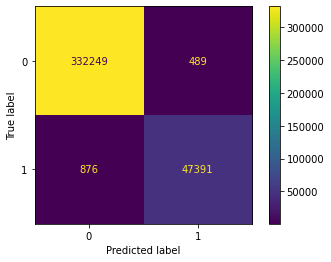

In [48]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

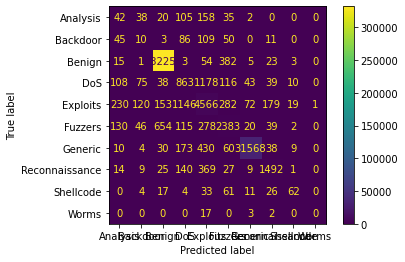

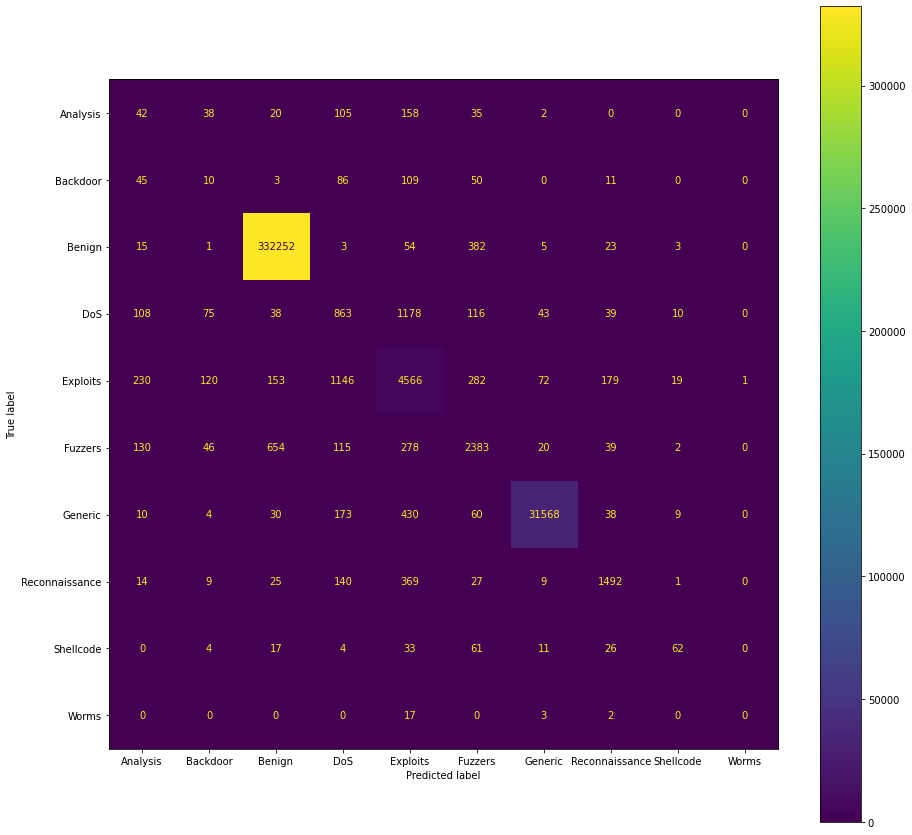

In [49]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [50]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [51]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9308466494175673

### Predição test50 multiclasse

In [54]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [55]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [56]:
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [57]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9138909842222709

### Precision e Recall do test50

In [58]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999224  0.921549  0.958816   1109380
           1   0.647467  0.995057  0.784483    160638

    accuracy                       0.930847   1270018
   macro avg   0.823345  0.958303  0.871650   1270018
weighted avg   0.954732  0.930847  0.936765   1270018



In [59]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.044693  0.077728  0.056753      1338
      Backdoor   0.046452  0.030928  0.037133      1164
        Benign   0.999054  0.921764  0.958854   1109380
           DoS   0.273143  0.424046  0.332263      8176
      Exploits   0.205093  0.664945  0.313493     22262
       Fuzzers   0.296515  0.744700  0.424148     12123
       Generic   0.870804  0.980063  0.922209    107740
Reconnaissance   0.754168  0.685686  0.718298      6993
     Shellcode   0.578454  0.327152  0.417936       755
         Worms   0.000000  0.000000  0.000000        87

      accuracy                       0.913891   1270018
     macro avg   0.406838  0.485701  0.418109   1270018
  weighted avg   0.959332  0.913891  0.931788   1270018



### Matriz de Confusão do test50

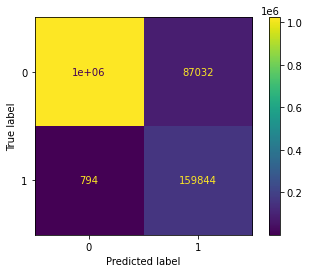

In [60]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

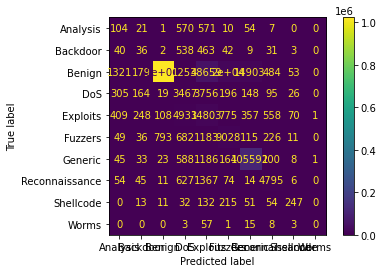

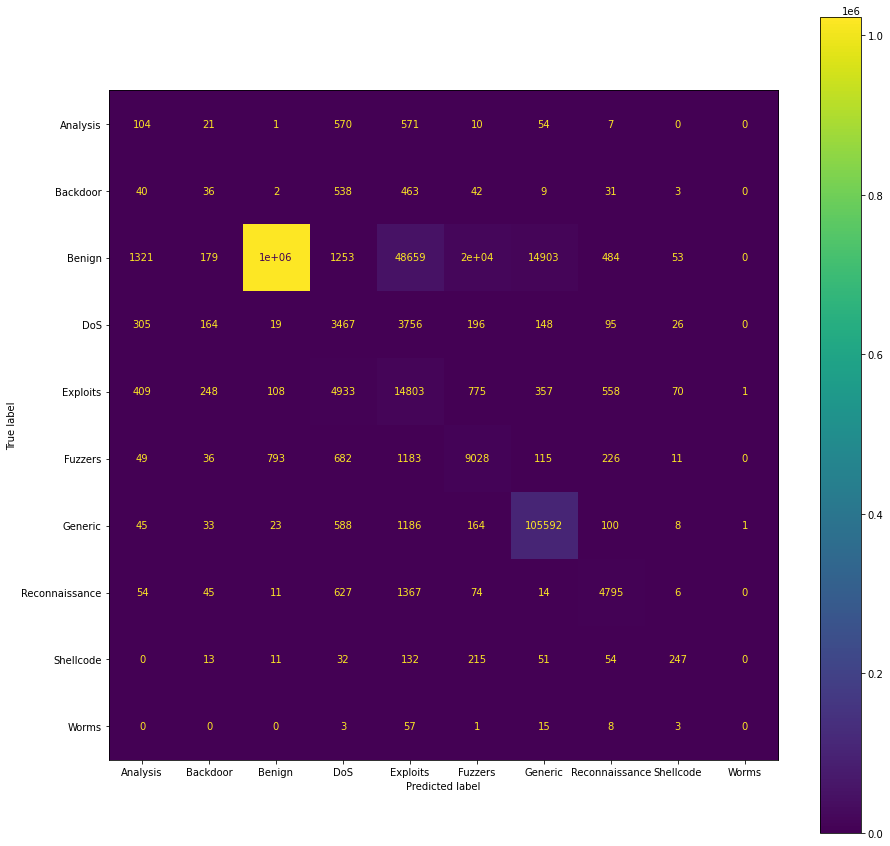

In [61]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)